# Pandas

## pandas基本介绍

## Series

In [1]:
import pandas as pd
import numpy as np

s = pd.Series([1, 3, 6, np.nan, 44, 1])
print(s)

0     1.0
1     3.0
2     6.0
3     NaN
4    44.0
5     1.0
dtype: float64


## DataFrame

In [6]:
dates = pd.date_range('20180101', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=['a', 'b', 'c', 'd'])

print(df)

                   a         b         c         d
2018-01-01 -1.162940 -0.954633 -0.771211  0.851020
2018-01-02 -0.578357  1.478543  0.734987  0.592461
2018-01-03 -1.247189 -1.009870 -0.748720  0.202590
2018-01-04  1.722796  1.887897  0.550508  0.715857
2018-01-05 -1.211695  0.955130  0.302027 -0.650235
2018-01-06 -0.240877  0.157945  0.512859  0.553275


## DataFrame的一些简单运用

In [7]:
print(df['b'])

2018-01-01   -0.954633
2018-01-02    1.478543
2018-01-03   -1.009870
2018-01-04    1.887897
2018-01-05    0.955130
2018-01-06    0.157945
Freq: D, Name: b, dtype: float64


### pandas默认索引

In [8]:
df1 = pd.DataFrame(np.arange(12).reshape((3, 4)))
print(df1)

   0  1   2   3
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11


### 构建每一列特定的数据

In [12]:
df2 = pd.DataFrame({'A': 1.,
                   'B': pd.Timestamp('20180102'),
                   'C': np.array([3] * 4, dtype='int32'),
                   'E': pd.Categorical(['test', 'train', 'test', 'train']),
                   'F': 'foo'})
print(df2)

     A          B  C      E    F
0  1.0 2018-01-02  3   test  foo
1  1.0 2018-01-02  3  train  foo
2  1.0 2018-01-02  3   test  foo
3  1.0 2018-01-02  3  train  foo


### 查看dataFrame的数据类型

In [13]:
print(df2.dtypes)

A           float64
B    datetime64[ns]
C             int32
E          category
F            object
dtype: object


### 查看行序号

In [14]:
print(df2.index)

RangeIndex(start=0, stop=4, step=1)


### 查看列序号

In [15]:
print(df2.columns)

Index(['A', 'B', 'C', 'E', 'F'], dtype='object')


### 查看所有值

In [16]:
print(df2.values)

[[1.0 Timestamp('2018-01-02 00:00:00') 3 'test' 'foo']
 [1.0 Timestamp('2018-01-02 00:00:00') 3 'train' 'foo']
 [1.0 Timestamp('2018-01-02 00:00:00') 3 'test' 'foo']
 [1.0 Timestamp('2018-01-02 00:00:00') 3 'train' 'foo']]


### 查看数据的描述

In [17]:
print(df.describe())

              a         b         c         d
count  6.000000  6.000000  6.000000  6.000000
mean  -0.453043  0.419168  0.096742  0.377495
std    1.140628  1.229993  0.677747  0.548205
min   -1.247189 -1.009870 -0.771211 -0.650235
25%   -1.199506 -0.676489 -0.486033  0.290261
50%   -0.870648  0.556537  0.407443  0.572868
75%   -0.325247  1.347689  0.541096  0.685008
max    1.722796  1.887897  0.734987  0.851020


### 对数据的index排序并输出

In [18]:
print(df2.sort_index(axis=1, ascending=False))

     F      E  C          B    A
0  foo   test  3 2018-01-02  1.0
1  foo  train  3 2018-01-02  1.0
2  foo   test  3 2018-01-02  1.0
3  foo  train  3 2018-01-02  1.0


### 对数的值排序

In [19]:
print(df2.sort_values(by='B'))

     A          B  C      E    F
0  1.0 2018-01-02  3   test  foo
1  1.0 2018-01-02  3  train  foo
2  1.0 2018-01-02  3   test  foo
3  1.0 2018-01-02  3  train  foo


# Pandas 选择数据

In [3]:
dates = pd.date_range('20180101', periods=6)
df = pd.DataFrame(np.arange(24).reshape((6, 4)), index=dates, columns=['A', 'B', 'C', 'D'])
print(df)

             A   B   C   D
2018-01-01   0   1   2   3
2018-01-02   4   5   6   7
2018-01-03   8   9  10  11
2018-01-04  12  13  14  15
2018-01-05  16  17  18  19
2018-01-06  20  21  22  23


## 简单的筛选

### 选取列

In [5]:
print(df['A'])
print(df.A)

2018-01-01     0
2018-01-02     4
2018-01-03     8
2018-01-04    12
2018-01-05    16
2018-01-06    20
Freq: D, Name: A, dtype: int32
2018-01-01     0
2018-01-02     4
2018-01-03     8
2018-01-04    12
2018-01-05    16
2018-01-06    20
Freq: D, Name: A, dtype: int32


### 选择多列

In [6]:
print(df[0:3])

            A  B   C   D
2018-01-01  0  1   2   3
2018-01-02  4  5   6   7
2018-01-03  8  9  10  11


In [7]:
print(df['20180101':'20180104'])

             A   B   C   D
2018-01-01   0   1   2   3
2018-01-02   4   5   6   7
2018-01-03   8   9  10  11
2018-01-04  12  13  14  15


## 根据标签 loc

### 先选行再选列

In [11]:
print(df.loc['20180101'])

A    0
B    1
C    2
D    3
Name: 2018-01-01 00:00:00, dtype: int32


In [12]:
print(df.loc[:, ['A', 'B']])

             A   B
2018-01-01   0   1
2018-01-02   4   5
2018-01-03   8   9
2018-01-04  12  13
2018-01-05  16  17
2018-01-06  20  21


In [13]:
print(df.loc['20180102', ['A', 'B']])

A    4
B    5
Name: 2018-01-02 00:00:00, dtype: int32


## 根据序列 iloc

### 通过位置选择

In [14]:
print(df.iloc[3, 1])

13


In [15]:
print(df.iloc[3:5, 1:3])

             B   C
2018-01-04  13  14
2018-01-05  17  18


In [16]:
print(df.iloc[[1, 3, 5], 1:3])

             B   C
2018-01-02   5   6
2018-01-04  13  14
2018-01-06  21  22


## 混合选择

In [17]:
print(df.ix[:3, ['A', 'C']])

            A   C
2018-01-01  0   2
2018-01-02  4   6
2018-01-03  8  10


## 通过判断的筛选

In [18]:
print(df[df.A > 8])

             A   B   C   D
2018-01-04  12  13  14  15
2018-01-05  16  17  18  19
2018-01-06  20  21  22  23


# Pandas设置值

## 根据位置设置loc和iloc

In [19]:
df.iloc[2, 2] = 1111
df.loc['20180101', 'B'] = 222
print(df)

             A    B     C   D
2018-01-01   0  222     2   3
2018-01-02   4    5     6   7
2018-01-03   8    9  1111  11
2018-01-04  12   13    14  15
2018-01-05  16   17    18  19
2018-01-06  20   21    22  23


## 根据条件设置

In [20]:
df.B[df.A > 4] = 0
print(df)

             A    B     C   D
2018-01-01   0  222     2   3
2018-01-02   4    5     6   7
2018-01-03   8    0  1111  11
2018-01-04  12    0    14  15
2018-01-05  16    0    18  19
2018-01-06  20    0    22  23


## 按行或列设置

In [21]:
df['F'] = np.nan
print(df)

             A    B     C   D   F
2018-01-01   0  222     2   3 NaN
2018-01-02   4    5     6   7 NaN
2018-01-03   8    0  1111  11 NaN
2018-01-04  12    0    14  15 NaN
2018-01-05  16    0    18  19 NaN
2018-01-06  20    0    22  23 NaN


## 添加数据

In [22]:
df ['E'] = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20180101', periods=6))
print(df)

             A    B     C   D   F  E
2018-01-01   0  222     2   3 NaN  1
2018-01-02   4    5     6   7 NaN  2
2018-01-03   8    0  1111  11 NaN  3
2018-01-04  12    0    14  15 NaN  4
2018-01-05  16    0    18  19 NaN  5
2018-01-06  20    0    22  23 NaN  6


# Pandas处理丢失数据

## 创建含NaN的矩阵

In [23]:
df.iloc[0, 1] = np.nan
df.iloc[1, 2] = np.nan
print(df)

             A    B       C   D   F  E
2018-01-01   0  NaN     2.0   3 NaN  1
2018-01-02   4  5.0     NaN   7 NaN  2
2018-01-03   8  0.0  1111.0  11 NaN  3
2018-01-04  12  0.0    14.0  15 NaN  4
2018-01-05  16  0.0    18.0  19 NaN  5
2018-01-06  20  0.0    22.0  23 NaN  6


## 丢弃NaN

In [28]:
# any: 只要存在NaN就drop掉
# all: 必须全部是NaN才drop
print(df.dropna(axis=1, how='any'))

             A   D  E
2018-01-01   0   3  1
2018-01-02   4   7  2
2018-01-03   8  11  3
2018-01-04  12  15  4
2018-01-05  16  19  5
2018-01-06  20  23  6


## 替换NaN

In [29]:
print(df.fillna(value=0))

             A    B       C   D    F  E
2018-01-01   0  0.0     2.0   3  0.0  1
2018-01-02   4  5.0     0.0   7  0.0  2
2018-01-03   8  0.0  1111.0  11  0.0  3
2018-01-04  12  0.0    14.0  15  0.0  4
2018-01-05  16  0.0    18.0  19  0.0  5
2018-01-06  20  0.0    22.0  23  0.0  6


## 判断是否缺失

In [31]:
print(df.isnull())

                A      B      C      D     F      E
2018-01-01  False   True  False  False  True  False
2018-01-02  False  False   True  False  True  False
2018-01-03  False  False  False  False  True  False
2018-01-04  False  False  False  False  True  False
2018-01-05  False  False  False  False  True  False
2018-01-06  False  False  False  False  True  False


### 检查在数据中是否存在NaN

In [32]:
print(np.any(df.isnull()) == True)

True


# Pandas导入导出

pandas可以读取与存取的资料格式有很多种，像csv、excel、json、html与pickle等…

## 读取csv

In [36]:
data = pd.read_csv('airline.csv')
print(data.iloc[:10, :])

          YEAR      Y      W       R      L      K
0  1948.000008  1.214  0.243  0.1454  1.415  0.612
1  1949.000008  1.354  0.260  0.2181  1.384  0.559
2  1950.000000  1.569  0.278  0.3157  1.388  0.573
3  1951.000000  1.948  0.297  0.3940  1.550  0.564
4  1952.000000  2.265  0.310  0.3559  1.802  0.574
5  1953.000000  2.731  0.322  0.3593  1.926  0.711
6  1954.000000  3.025  0.335  0.4025  1.964  0.776
7  1955.000000  3.562  0.350  0.3961  2.116  0.827
8  1956.000000  3.979  0.361  0.3822  2.435  0.800
9  1957.000364  4.420  0.379  0.3045  2.707  0.921


## 将资料存成pickle

In [38]:
data.to_pickle('airline.pickle')

# Pandas合并concat

In [4]:
df1 = pd.DataFrame(np.ones((3, 4)) * 0, columns=['a', 'b', 'c', 'd'])
df2 = pd.DataFrame(np.ones((3, 4)) * 1, columns=['a', 'b', 'c', 'd'])
df3 = pd.DataFrame(np.ones((3, 4)) * 2, columns=['a', 'b', 'c', 'd'])

## axis(合并方向)

In [5]:
res = pd.concat([df1, df2, df3], axis=0)
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0
0  2.0  2.0  2.0  2.0
1  2.0  2.0  2.0  2.0
2  2.0  2.0  2.0  2.0


## ignore_index(重置index)

In [6]:
res = pd.concat([df1, df2, df3], axis=0, ignore_index=True)
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0
6  2.0  2.0  2.0  2.0
7  2.0  2.0  2.0  2.0
8  2.0  2.0  2.0  2.0


## join(合并方式)

In [4]:
# join='outer'为预设值，依照column来做纵向合并
# 有相同的column上下合并在一起，其他各自成列
df1 = pd.DataFrame(np.ones((3, 4)) * 0, columns=['a', 'b', 'c', 'd'])
df2 = pd.DataFrame(np.ones((3, 4)) * 1, columns=['b', 'c', 'd', 'e'])

### 纵向外合并

In [6]:
res = pd.concat([df1, df2], axis=0, join='outer')
print(res)

     a    b    c    d    e
0  0.0  0.0  0.0  0.0  NaN
1  0.0  0.0  0.0  0.0  NaN
2  0.0  0.0  0.0  0.0  NaN
0  NaN  1.0  1.0  1.0  1.0
1  NaN  1.0  1.0  1.0  1.0
2  NaN  1.0  1.0  1.0  1.0


### 纵向内合并

In [8]:
res = pd.concat([df1, df2], axis=0, join='inner')
print(res)

     b    c    d
0  0.0  0.0  0.0
1  0.0  0.0  0.0
2  0.0  0.0  0.0
0  1.0  1.0  1.0
1  1.0  1.0  1.0
2  1.0  1.0  1.0


## join_axes(依照axes合并)

In [12]:
df1 = pd.DataFrame(np.ones((3, 4)) * 0, index=[1, 2, 3], columns=['a', 'b', 'c', 'd'])
df2 = pd.DataFrame(np.ones((3, 4)) * 1, index=[2, 3, 4], columns=['b', 'c', 'd', 'e'])

### 依照“df1.index”进行横向合并

In [13]:
res = pd.concat([df1, df2], axis=1, join_axes=[df1.index])
print(res)

     a    b    c    d    b    c    d    e
1  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN
2  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
3  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0


### 移除“join_axes”并打印结果

In [14]:
res = pd.concat([df1, df2], axis=1)
print(res)

     a    b    c    d    b    c    d    e
1  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN
2  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
3  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
4  NaN  NaN  NaN  NaN  1.0  1.0  1.0  1.0


## append(合并数据)

In [15]:
df1 = pd.DataFrame(np.ones((3, 4)) * 0, columns=['a', 'b', 'c', 'd'])
df2 = pd.DataFrame(np.ones((3, 4)) * 1, columns=['a', 'b', 'c', 'd'])
df3 = pd.DataFrame(np.ones((3, 4)) * 1, columns=['a', 'b', 'c', 'd'])

### 将df2合并到df1下面，并重置index

In [16]:
res = df1.append(df2, ignore_index=True)
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0


### 合并多个df，将df2,df3合并到df1下面

In [17]:
res = df1.append([df2, df3], ignore_index=True)
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0
6  1.0  1.0  1.0  1.0
7  1.0  1.0  1.0  1.0
8  1.0  1.0  1.0  1.0


### 合并series，将s1合并到df1

In [19]:
s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
res = df1.append(s1, ignore_index=True)
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  2.0  3.0  4.0


# Pandas合并merge

## 依据一组key合并

In [21]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                   'A': ['A0', 'A1', 'A2', 'A3'],
                   'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                    'C': ['C1', 'C2', 'C3', 'C4'],
                    'D': ['D1', 'D2', 'D3', 'D4']})
print(left)
print(right)

    A   B key
0  A0  B0  K0
1  A1  B1  K1
2  A2  B2  K2
3  A3  B3  K3
    C   D key
0  C1  D1  K0
1  C2  D2  K1
2  C3  D3  K2
3  C4  D4  K3


### 依据key column合并

In [22]:
res = pd.merge(left, right, on='key')
print(res)

    A   B key   C   D
0  A0  B0  K0  C1  D1
1  A1  B1  K1  C2  D2
2  A2  B2  K2  C3  D3
3  A3  B3  K3  C4  D4


## 依据两组key合并

In [26]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                   'A': ['A0', 'A1', 'A2', 'A3'],
                   'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                      'key2': ['K0', 'K0', 'K0', 'K0'],
                    'C': ['C1', 'C2', 'C3', 'C4'],
                    'D': ['D1', 'D2', 'D3', 'D4']})
print(left)
print(right)

    A   B key1 key2
0  A0  B0   K0   K0
1  A1  B1   K0   K1
2  A2  B2   K1   K0
3  A3  B3   K2   K1
    C   D key1 key2
0  C1  D1   K0   K0
1  C2  D2   K1   K0
2  C3  D3   K1   K0
3  C4  D4   K2   K0


### 依据key1与key2 columns进行inner合并

In [28]:
res = pd.merge(left, right, on=['key1', 'key2'], how='inner')
print(res)

    A   B key1 key2   C   D
0  A0  B0   K0   K0  C1  D1
1  A2  B2   K1   K0  C2  D2
2  A2  B2   K1   K0  C3  D3


### outer连接

In [29]:
res = pd.merge(left, right, on=['key1', 'key2'], how='outer')
print(res)

     A    B key1 key2    C    D
0   A0   B0   K0   K0   C1   D1
1   A1   B1   K0   K1  NaN  NaN
2   A2   B2   K1   K0   C2   D2
3   A2   B2   K1   K0   C3   D3
4   A3   B3   K2   K1  NaN  NaN
5  NaN  NaN   K2   K0   C4   D4


### left连接

In [31]:
res = pd.merge(left, right, on=['key1', 'key2'], how='left')
print(res)

    A   B key1 key2    C    D
0  A0  B0   K0   K0   C1   D1
1  A1  B1   K0   K1  NaN  NaN
2  A2  B2   K1   K0   C2   D2
3  A2  B2   K1   K0   C3   D3
4  A3  B3   K2   K1  NaN  NaN


### right连接

In [32]:
res = pd.merge(left, right, on=['key1', 'key2'], how='right')
print(res)

     A    B key1 key2   C   D
0   A0   B0   K0   K0  C1  D1
1   A2   B2   K1   K0  C2  D2
2   A2   B2   K1   K0  C3  D3
3  NaN  NaN   K2   K0  C4  D4


## Indicator(将合并的记df1录放在新的一列)

In [36]:
df1 = pd.DataFrame({'col1': [0, 1], 'col_left': ['a', 'b']})
df2 = pd.DataFrame({'col1': [1, 2, 2], 'col_right': [2, 2, 2]})
print(df1)
print(df2)

   col1 col_left
0     0        a
1     1        b
   col1  col_right
0     1          2
1     2          2
2     2          2


### 依据col1进行合并，并启用indicator

In [37]:
res = pd.merge(df1, df2, on='col1', how='outer', indicator=True)
print(res)

   col1 col_left  col_right      _merge
0   0.0        a        NaN   left_only
1   1.0        b        2.0        both
2   2.0      NaN        2.0  right_only
3   2.0      NaN        2.0  right_only


### 自定义indicator

In [39]:
res = pd.merge(df1, df2, on='col1', how='outer', indicator='indeicator_columns')
print(res)

   col1 col_left  col_right indeicator_columns
0   0.0        a        NaN          left_only
1   1.0        b        2.0               both
2   2.0      NaN        2.0         right_only
3   2.0      NaN        2.0         right_only


## 依据index合并

In [40]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                    'B': ['B1', 'B2', 'B3']},
                    index = ['K0', 'K1', 'K2'])
right = pd.DataFrame({'C': ['C0', 'C1', 'C2'],
                     'D': ['D0', 'D1', 'D2']},
                    index = ['K0', 'K2', 'K3'])
print(left)
print(right)

     A   B
K0  A0  B1
K1  A1  B2
K2  A2  B3
     C   D
K0  C0  D0
K2  C1  D1
K3  C2  D2


### 依据index进行outer合并

In [41]:
res = pd.merge(left, right, left_index=True, right_index=True, how='outer')
print(res)

      A    B    C    D
K0   A0   B1   C0   D0
K1   A1   B2  NaN  NaN
K2   A2   B3   C1   D1
K3  NaN  NaN   C2   D2


### 依据index进行inner合并

In [42]:
res = pd.merge(left, right, left_index=True, right_index=True, how='inner')
print(res)

     A   B   C   D
K0  A0  B1  C0  D0
K2  A2  B3  C1  D1


## 解决overlapping问题

In [44]:
boys = pd.DataFrame({'k': ['K0', 'K1', 'K2'], 'age': [1, 2, 3]})
girls = pd.DataFrame({'k': ['K0', 'K0', 'K3'], 'age': [4, 5, 6]})
print(boys)
print(girls)

   age   k
0    1  K0
1    2  K1
2    3  K2
   age   k
0    4  K0
1    5  K1
2    6  K2


### 使用suffixes解决overlapping问题

In [45]:
res = pd.merge(boys, girls, on='k', suffixes=['_boy', '_girl'], how='inner')
print(res)

   age_boy   k  age_girl
0        1  K0         4
1        2  K1         5
2        3  K2         6


# Pandas plot出图

In [49]:
%matplotlib inline

import matplotlib.pyplot as plt

## Series可视化

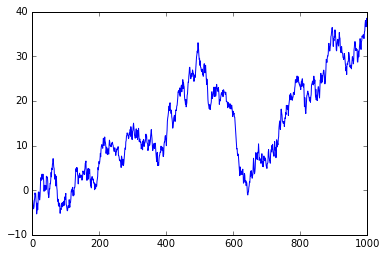

In [51]:
data = pd.Series(np.random.randn(1000), index=np.arange(1000))

# 为了方便观看，累加数据
data = data.cumsum()

# pandas数据可以直接观看其可视化形式
data.plot()
plt.show()

## DataFrame可视化

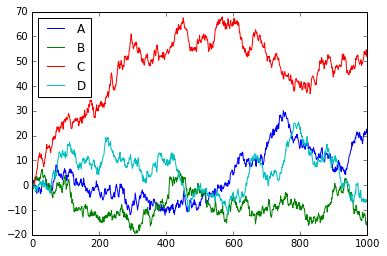

In [54]:
data = pd.DataFrame(np.random.randn(1000, 4), index=np.arange(1000), columns=list("ABCD"))
data = data.cumsum()
data.plot()
plt.show()

### scatter图

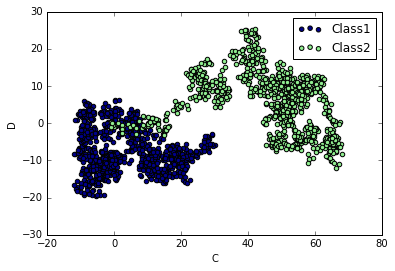

In [57]:
ax = data.plot.scatter('A', 'B', color='DarkBlue', label='Class1')

data.plot.scatter('C', 'D', color='LightGreen', label='Class2', ax=ax)
plt.show()